In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
#leemos el archivo

df = pd.read_csv('Forbes.csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [3]:
#vamos a explorar los datos 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [4]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [5]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

Solo hay 24 datos null en el data set

In [6]:
#correcion de los nombres en el data frame
df['Sport'].replace({'soccer': 'Soccer', 'golf':'Golf', 'Auto Racing':'Auto racing', 'auto racing':'Auto racing',
                     'boxing':'Boxing', 'ice hockey':'Ice Hockey', 'F1 Motorsports':'F1 racing','tennis':'Tennis','Auto Racing (Nascar)':'NASCAR',
                     'basketball':'Basketball','baseball':'Baseball'},inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_68668\331485403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sport'].replace({'soccer': 'Soccer', 'golf':'Golf', 'Auto Racing':'Auto racing', 'auto racing':'Auto racing',


In [7]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,Auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,Auto racing,1990,9.0


In [8]:
df['Nationality'].value_counts()

Nationality
USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: count, dtype: int64

In [9]:
df.groupby('Nationality').count()

,S.NO,Name,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
Nationality,,,,,,,
Argentina,9,9,9,9,9,9,9
Australia,1,1,1,0,1,1,1
Austria,1,1,1,1,1,1,1
Brazil,9,9,9,8,9,9,9
Canada,6,6,6,6,6,6,6
Dominican,1,1,1,1,1,1,1
Filipino,1,1,1,1,1,1,1
Finland,3,3,3,3,3,3,3
France,3,3,3,2,3,3,3


Text(0.5, 1.0, 'atletas de cada pais')

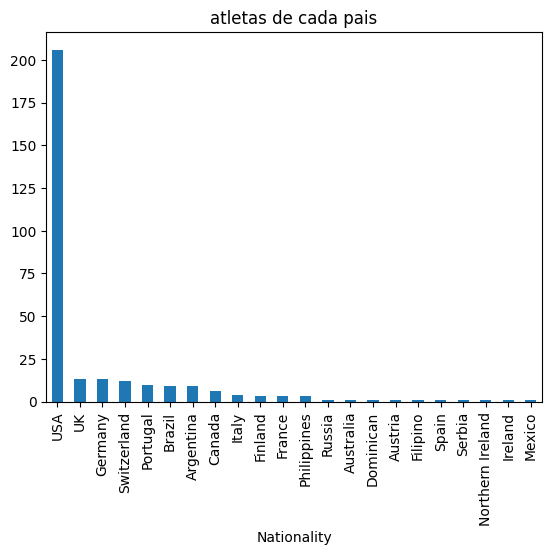

In [10]:
df['Nationality'].value_counts().plot.bar()
plt.title('atletas de cada pais')

In [16]:
Aux = df.groupby(['Nationality', 'Sport'])['Name'].count()
Aux

Nationality       Sport                       
Argentina         Soccer                           9
Australia         Golf                             1
Austria           Auto racing                      1
Brazil            Auto racing                      4
                  Soccer                           5
Canada            Auto racing                      2
                  Boxing                           1
                  Hockey                           1
                  Ice Hockey                       2
Dominican         Baseball                         1
Filipino          Boxing                           1
Finland           F1 racing                        3
France            Auto racing                      3
Germany           Auto racing                      3
                  F1 racing                       10
Ireland           MMA                              1
Italy             motorcycle gp                    4
Mexico            Boxing                           1

In [12]:
Aux_df = Aux.reset_index()

Aux_df.rename(columns={'Name':'Count'},inplace=True)


In [13]:
Aux_df.sort_values(by = 'Count', ascending= False)

,Nationality,Sport,Count
31,USA,Basketball,81
33,USA,Golf,42
32,USA,Boxing,40
27,USA,American Football,17
24,Switzerland,Tennis,12
20,Portugal,Soccer,10
14,Germany,F1 racing,10
26,UK,Soccer,9
0,Argentina,Soccer,9
37,USA,Tennis,9


Grafico de cuantos deportistas hay por deporte en cada pais 

C:\Users\carlo\AppData\Local\Temp\ipykernel_68668\1613222144.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


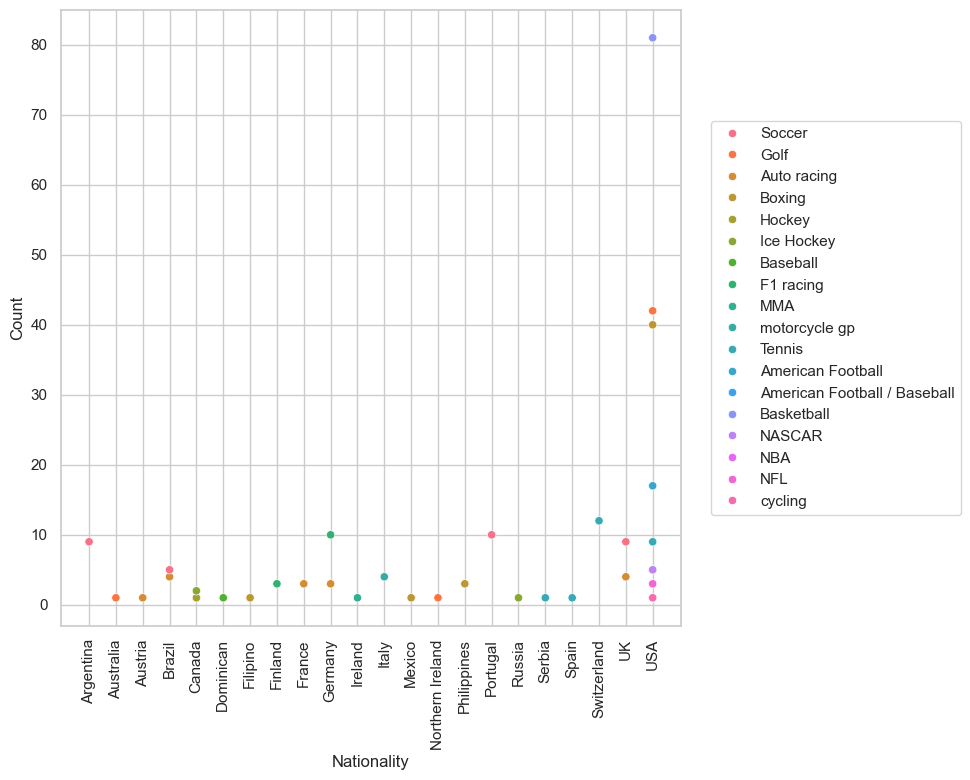

In [14]:
sn.set(style='whitegrid')
plt.figure(figsize=(8,8)) 
ax=sn.scatterplot(data = Aux_df, x = 'Nationality', y = 'Count', hue = 'Sport')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.legend(loc ='center', bbox_to_anchor = (1.25,0.5))
plt.show()

Analisis de ganancias por pais

<Axes: xlabel='Nationality'>

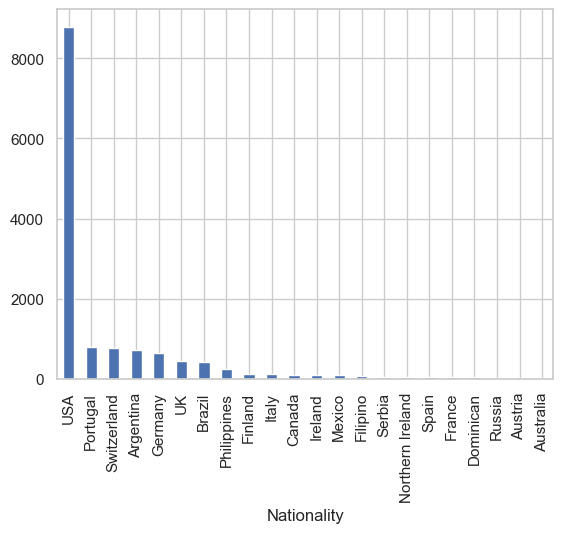

In [18]:
df.groupby(['Nationality'])['earnings ($ million)'].sum().sort_values(ascending=False).plot(kind='bar')


Que deporte es el que genera mas ganancias

<Axes: xlabel='Sport'>

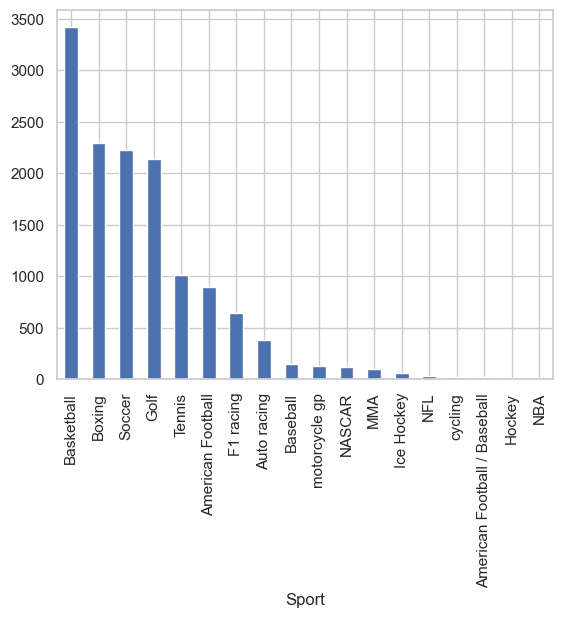

In [21]:
df.groupby(['Sport'])['earnings ($ million)'].sum().sort_values(ascending=False).plot(kind ='bar')

vamos a contrastar estas cifras con que cantidad de deportistas hay en cada deporte

<Axes: xlabel='Sport'>

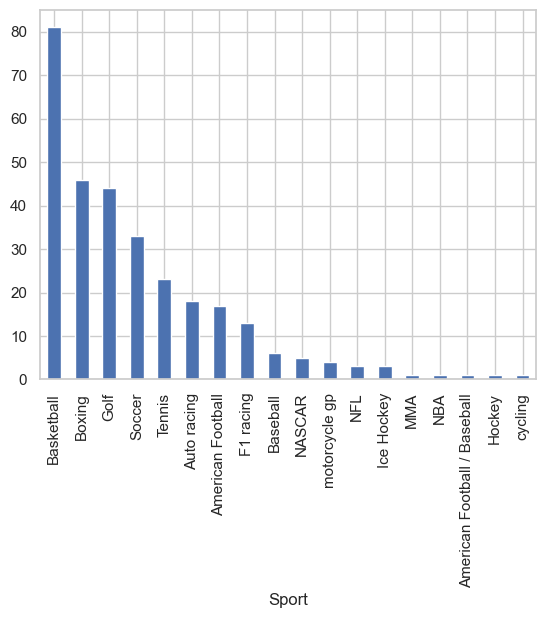

In [22]:
df.groupby(['Sport'])['Name'].count().sort_values(ascending=False).plot(kind='bar')

como podemos ver esta relacionado la cantidad de deportistas con cual deporte a generado mas ganancias

In [24]:
df.sort_values(by='earnings ($ million)',ascending=False).head(10)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
242,243,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
281,282,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
171,172,Tiger Woods,USA,1,1,Golf,2008,115.0
272,273,Lionel Messi,Argentina,2,3,Soccer,2018,111.0
181,182,Tiger Woods,USA,1,1,Golf,2009,110.0
282,283,Cristiano Ronaldo,Portugal,2,3,Soccer,2019,109.0
273,274,Cristiano Ronaldo,Portugal,3,1,Soccer,2018,108.0
291,292,Roger Federer,Switzerland,1,5,Tennis,2020,106.3


Aunque el deporte que tiene mas ganancias sea el basketball sus deportistas no estan ni en el top 10 de los que mas ganan

ahora miremos quien ha ganamos en todos estos años

<Axes: xlabel='Name'>

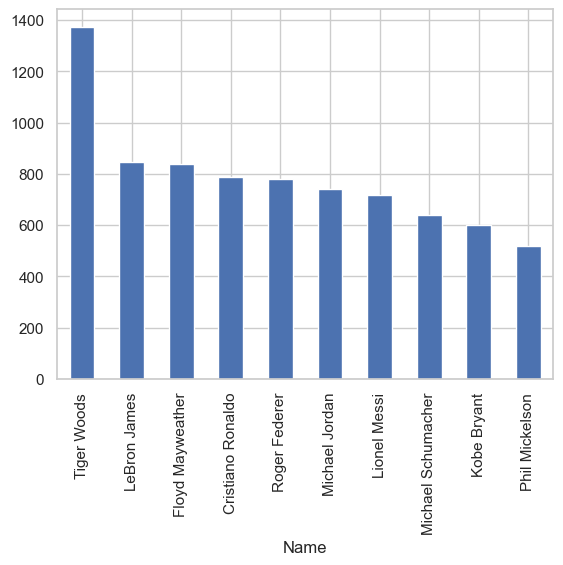

In [25]:
df.groupby(['Name'])['earnings ($ million)'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

miremos que deportista  a ganado mas por año 

In [41]:
idx=df.groupby(['Year'])['earnings ($ million)'].idxmax()

max_earnings= df.loc[idx]

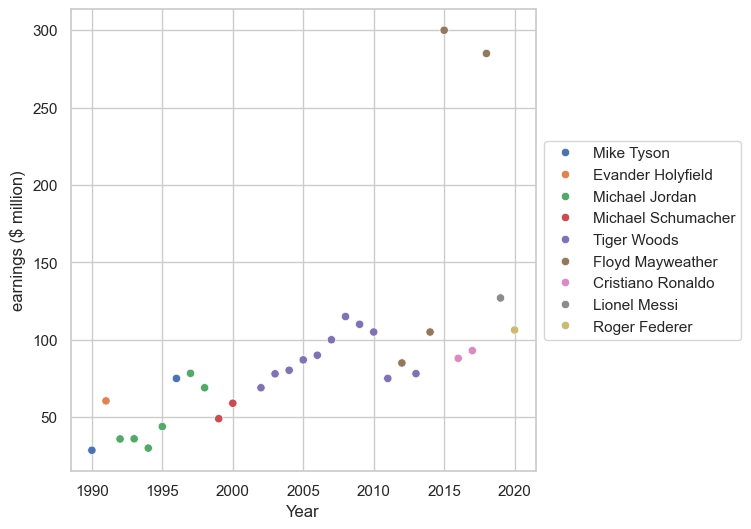

In [47]:
plt.figure(figsize=(6,6)) 
sn.scatterplot(data = max_earnings, x = 'Year', y = 'earnings ($ million)', hue = 'Name')
plt.legend(loc ='center', bbox_to_anchor = (1.23,0.5))
plt.show()

como podemos ver tiger woods es el que ha ganado mas dinero durante mas años y lebron james aunque ningun año haya sido el que ganara mas dinero 
ha mantenido muy buenas ganancias durante los años ya que ha sido el segundo que ha ganamos mas dinero 

miremos como le ha ido cada año 

In [49]:
def get_earnings_by_name(df, name):
    return df.loc[df['Name'] == name, ['Year', 'Name', 'earnings ($ million)']]

In [50]:
lebron = get_earnings_by_name(df, 'LeBron James')
lebron

,Year,Name,earnings ($ million)
177,2008,LeBron James,38.0
186,2009,LeBron James,40.0
197,2010,LeBron James,42.8
203,2011,LeBron James,48.0
214,2012,LeBron James,53.0
224,2013,LeBron James,59.8
233,2014,LeBron James,72.3
246,2015,LeBron James,64.8
253,2016,LeBron James,77.2
262,2017,LeBron James,86.2


<function matplotlib.pyplot.show(close=None, block=None)>

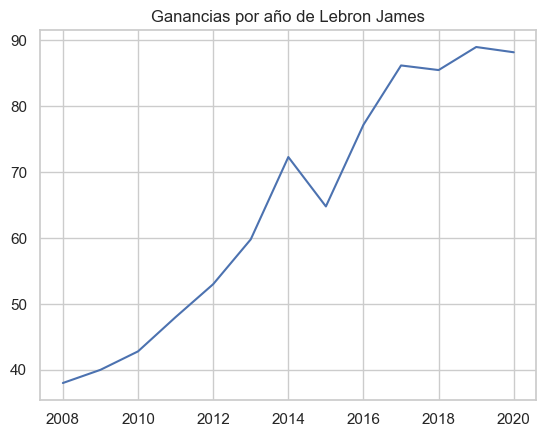

In [52]:
plt.plot(lebron['Year'],lebron['earnings ($ million)'])
plt.title('Ganancias por año de Lebron James')
plt.show

Ahora miremos las ganancias de tiger woods

In [53]:
tiger = get_earnings_by_name(df, 'Tiger Woods')
tiger

,Year,Name,earnings ($ million)
75,1997,Tiger Woods,26.1
83,1998,Tiger Woods,26.8
91,1999,Tiger Woods,47.0
101,2000,Tiger Woods,53.0
110,2002,Tiger Woods,69.0
121,2003,Tiger Woods,78.0
131,2004,Tiger Woods,80.3
141,2005,Tiger Woods,87.0
151,2006,Tiger Woods,90.0
161,2007,Tiger Woods,100.0


<function matplotlib.pyplot.show(close=None, block=None)>

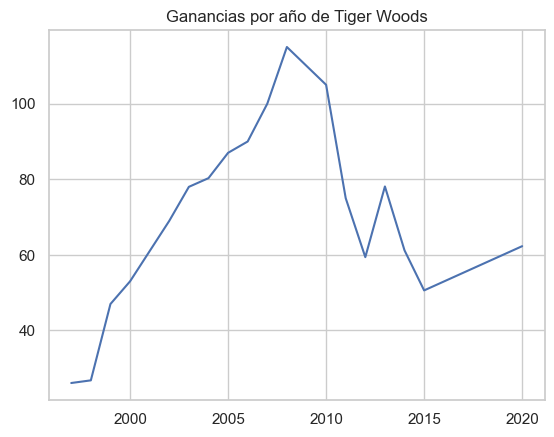

In [54]:
plt.plot(tiger['Year'],tiger['earnings ($ million)'])
plt.title('Ganancias por año de Tiger Woods')
plt.show

igual que lebron, tiger woods tuvo un bajon en sus ganancias en los años 2015 y 2016, miremos como se comporta otros deportistas

In [55]:
#floyd  mayweather
floyd = get_earnings_by_name(df, 'Floyd Mayweather')
floyd

,Year,Name,earnings ($ million)
192,2010,Floyd Mayweather,65.0
211,2012,Floyd Mayweather,85.0
231,2014,Floyd Mayweather,105.0
241,2015,Floyd Mayweather,300.0
271,2018,Floyd Mayweather,285.0


<function matplotlib.pyplot.show(close=None, block=None)>

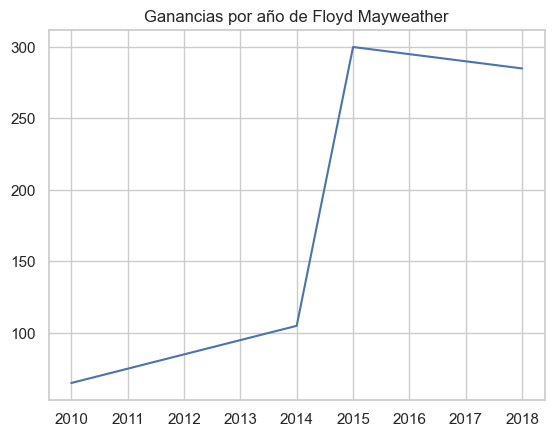

: 

In [58]:
plt.plot(floyd['Year'],floyd['earnings ($ million)'])
plt.title('Ganancias por año de Floyd Mayweather')
plt.show

miremos como se comporta  las ganancias por año 

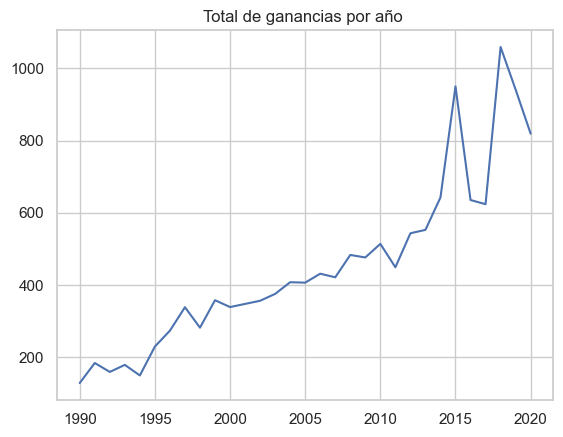

In [57]:
plt.plot(df.groupby(['Year'])['earnings ($ million)'].sum())
plt.title('Total de ganancias por año ')
plt.show()